In [1523]:
import numpy as np

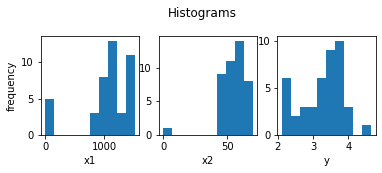

In [1524]:
import matplotlib.pyplot as plt
from scipy.stats import chi2, t
from data import y, x1, x2, x3, almost_zero
from functions import log
n = len(y)
m = 3
alpha = 0.05
# show data
plt.subplot(231)
plt.hist(x1)
plt.xlabel("x1")
plt.ylabel("frequency")
plt.subplot(232)
plt.hist(x2)
plt.xlabel("x2")
plt.subplot(233)
plt.hist(y)
plt.xlabel("y")
plt.suptitle('Histograms')

# linear regression
F = np.array([])
F_ws = np.array([])
# non-linear
F_log = np.array([])
F_exp = np.array([])

In [1525]:
for i in range(n):
    F = np.append(F, 1)
    F = np.append(F, x1[i])
    F = np.append(F, x2[i])
    F = np.append(F, x3[i])
    F_log = np.append(F_log, [1.,
                              log(x1[i]),
                              log(x2[i]),
                              log(x3[i])])
    F_exp = np.append(F_exp, [almost_zero, x1[i], x2[i], x3[i]])

In [1526]:
F = F.reshape(n, m + 1)
F_log = F_log.reshape(n, m + 1)
F_exp = F_exp.reshape(n, m + 1)
print(f"F =\n{F}\nF_log =\n{F_log}")

F =
[[1.00e+00 0.00e+00 6.20e+01 0.00e+00]
 [1.00e+00 0.00e+00 5.60e+01 1.00e+00]
 [1.00e+00 0.00e+00 4.50e+01 0.00e+00]
 [1.00e+00 0.00e+00 6.90e+01 1.00e+00]
 [1.00e+00 0.00e+00 6.00e+01 1.00e+00]
 [1.00e+00 8.70e+02 5.50e+01 0.00e+00]
 [1.00e+00 8.70e+02 4.20e+01 1.00e+00]
 [1.00e+00 8.80e+02 5.00e+01 1.00e+00]
 [1.00e+00 9.40e+02 4.40e+01 1.00e+00]
 [1.00e+00 9.50e+02 5.20e+01 1.00e+00]
 [1.00e+00 9.80e+02 4.90e+01 1.00e+00]
 [1.00e+00 9.90e+02 5.30e+01 1.00e+00]
 [1.00e+00 9.90e+02 6.00e+01 1.00e+00]
 [1.00e+00 9.90e+02 6.30e+01 1.00e+00]
 [1.00e+00 1.01e+03 7.00e+01 0.00e+00]
 [1.00e+00 1.05e+03 5.80e+01 0.00e+00]
 [1.00e+00 1.08e+03 5.60e+01 0.00e+00]
 [1.00e+00 1.08e+03 6.10e+01 0.00e+00]
 [1.00e+00 1.09e+03 5.80e+01 0.00e+00]
 [1.00e+00 1.12e+03 0.00e+00 0.00e+00]
 [1.00e+00 1.12e+03 4.70e+01 1.00e+00]
 [1.00e+00 1.12e+03 6.50e+01 1.00e+00]
 [1.00e+00 1.17e+03 4.30e+01 0.00e+00]
 [1.00e+00 1.18e+03 4.50e+01 0.00e+00]
 [1.00e+00 1.18e+03 6.50e+01 0.00e+00]
 [1.00e+00 1.18e+03 6

In [1527]:
# without taking gender into account
for i in range(n):
    F_ws = np.append(F_ws, 1)
    F_ws = np.append(F_ws, x1[i])
    F_ws = np.append(F_ws, x2[i])
F_ws = F_ws.reshape(n, m)
B_ws = np.linalg.inv(F_ws.T.dot(F_ws)).dot(F_ws.T.dot(y))

In [1528]:
B = np.linalg.inv(F.T.dot(F)).dot(F.T.dot(y))
B_log = np.linalg.inv(F_log.T.dot(F_log)).dot(F_log.T.dot(y))
y_log = np.log(y)
B_exp = np.linalg.inv(F_exp.T.dot(F_exp)).dot(F_exp.T.dot(y_log))
print(f"B = {B}\nB_log = {B_log}\nB_exp = {B_exp}")


B = [ 1.88801339e+00  1.23375869e-03  2.60069259e-03 -5.96815084e-02]
B_log = [ 3.22313058e+00  9.09052763e-03  1.47278643e-03 -2.00683098e-03]
B_exp = [ 7.13076673e+50  4.08154349e-04  8.06674467e-04 -2.07185324e-02]


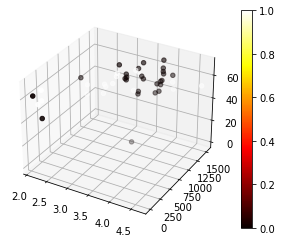

In [1529]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
img_dataset = ax.scatter(y, x1, x2, c=x3, cmap=plt.hot())
fig.colorbar(img_dataset)

plt.show()

In [1530]:
# linear regression model
y_roz = B[0] + B[1]*x1 + B[2]*x2 + B[3]*x3
y_roz_ws = B_ws[0] + B_ws[1]*x1 + B_ws[2]*x2
# logarithmic regression model (y = b_1*log(x_1) + b_2*log(x_2) + b_3*log(x_3))
y_log_roz = B_log[0]+[B_log[1]*log(x1[i]) + B_log[2]*log(x2[i]) + B_log[3]*log(x3[i]) for i in range(len(x1))]
# exp regression model (y = b_1*e^(b_2*x_1+b_3*x_2+b_4*x_3))
y_exp_roz = B_log[0]*np.exp(B_exp[1]*x1 + B_exp[2]*x2 + B_exp[3]*x3)
print(f"y_roz =\n{y_roz}\ny_log_roz =\n{y_log_roz}\ny_exp_roz =\n{y_exp_roz}")

y_roz =
[2.04925633 1.97397067 2.00504456 2.00777967 1.98437344 3.10442155
 3.01093104 3.04407416 3.10249553 3.13563866 3.16484934 3.1875897
 3.20579455 3.21359662 3.31615815 3.33430019 3.36611157 3.37911503
 3.38365054 3.26982313 3.33237417 3.37918664 3.44334085 3.46087982
 3.51289367 3.44541008 3.53170158 3.56290989 3.5265002  3.63814154
 3.67128467 3.65568052 3.71349882 3.70569674 3.71609951 3.77131712
 3.7791192  3.79732404 3.76611573 3.85961504 3.78432938 3.76872522
 3.83888111]
y_log_roz =
[2.39735744 2.16154168 2.39688545 2.16184913 2.16164329 3.52622755
 3.29016454 3.29052522 3.29093654 3.29127877 3.29147389 3.29168175
 3.29186445 3.29193631 3.52793915 3.52801527 3.52821967 3.52834563
 3.52835514 3.34966977 3.29262638 3.29310392 3.52855826 3.52870259
 3.52924417 3.29350872 3.52930458 3.52958154 3.5292529  3.52968879
 3.53001367 3.5298254  3.53027271 3.53018519 3.53030076 3.53068038
 3.53075224 3.53090741 3.53063045 3.53108393 3.29525116 3.29506289
 3.29555135]
y_exp_roz =
[3.38

In [1531]:
# GETEROSKEDACITY CHECK

In [1532]:
k = 3

In [1533]:
step = int(len(y)/k)
step

14

In [1534]:
Sr = np.array([])
nr = np.array([])
for i in range(k-1):
    Sr = np.append(Sr, 0)
    print(y[step*i:step*(i+1)])
    mean = y[step*i:step*(i+1)].mean()
    Sr[i] += sum((y[step*i:step*(i+1)] - mean)**2)
    nr = np.append(nr, len(y[step*i:step*(i+1)]))

[2.11 2.23 2.32 2.32 2.32 2.35 2.5  2.5  2.83 2.85 2.85 3.01 3.1  3.12]
[3.15 3.25 3.25 3.25 3.25 3.35 3.39 3.44 3.45 3.45 3.45 3.45 3.5  3.54]


In [1535]:
Sr

array([1.56109286, 0.18309286])

In [1536]:
y[step*(k-1):n]

array([3.54, 3.72, 3.75, 3.8 , 3.81, 3.81, 3.84, 3.84, 3.84, 3.85, 3.85,
       4.  , 4.  , 4.02, 4.65])

In [1537]:
mean = y[step*(k-1):n].mean()
Sr = np.append(Sr, sum((y[step*(k-1):n] - mean)**2))
Sr

array([1.56109286, 0.18309286, 0.82124   ])

In [1538]:
nr = np.append(nr, len(y[step*(k-1):n]))
nr

array([14., 14., 15.])

In [1539]:
S = sum(Sr)

In [1540]:
nu = 1
for i in range(len(Sr)):
    nu *= (Sr[i]/nr[i])**(nr[i]/2)

In [1541]:
nu

4.8389343948788375e-30

In [1542]:
(S/n)**(n/2)

4.757252915649831e-27

In [1543]:
nu /= (S/n)**(n/2)
nu = - 2 * np.log(nu)
print(f"Nu: {nu}")

Nu: 13.781462263852928


In [1544]:
chi2.ppf(1 - alpha/2,k-1)

7.377758908227871

In [1545]:
if nu < chi2.ppf(1 - alpha/2,k-1):
    print('Heteroskedasticity is absent')
else:
    print('Heteroskedasticity is present')

Heteroskedasticity is present


In [1546]:
# AUTO CORRELATION CHECK
U = y - y_roz
U_log = y - y_log_roz
U_exp = y - np.exp(y_exp_roz)

In [1547]:
DW = 0
DW_log = 0
DW_exp = 0

In [1548]:
for i in range(1, n):
    DW += (U[i] - U[i - 1])**2
    DW_log += (U_log[i] - U_log[i - 1])**2
    DW_exp += (U_exp[i] - U_exp[i - 1])**2

In [1549]:
DW /= sum(U**2)
DW_log /= sum(U_log**2)
DW_exp /= sum(U_exp**2)

In [1550]:
print(f"DW: {DW}")
print(f"DW_log: {DW_log}")
print(f"DW_exp: {DW_exp}")

DW: 0.6462321508111161
DW_log: 0.3872209277448015
DW_exp: 0.013473198011249075


In [1551]:
# FROM DARBIN WATSON STATISTIC TABLE
d1 = 1.36
dn = 1.66

In [1552]:
def check_auto_correlation(DW, type):
    if DW < d1:
        print(f'Auto correlation for {type} model is present')
    if DW > dn:
        print(f'Auto correlation for {type} model is absent')
    if d1 < DW < dn:
        print(f'More observations for {type} model needed')

check_auto_correlation(DW, "linear")
check_auto_correlation(DW_exp, "exponential")
check_auto_correlation(DW_log, "logarithmic")

# COEFFICIENTS SIGNIFICANCE CHECK

Auto correlation for linear model is present
Auto correlation for exponential model is present
Auto correlation for logarithmic model is present


In [1553]:
sigma_eps = (sum((y-y_roz)**2)/(n- m - 1))**0.5
sigma_log_eps = (sum((y-y_log_roz)**2)/(n- m - 1))**0.5
sigma_exp_eps = (sum((y_log-y_exp_roz)**2)/(n- m - 1))**0.5
print(f"sigma_eps = {sigma_eps}\nsigma_log_exp = {sigma_log_eps}\nsigma_exp_exp = {sigma_exp_eps}")

sigma_eps = 0.2673734792956212
sigma_log_exp = 0.45102315509391483
sigma_exp_exp = 4.2710143161926855


In [1554]:
F

array([[1.00e+00, 0.00e+00, 6.20e+01, 0.00e+00],
       [1.00e+00, 0.00e+00, 5.60e+01, 1.00e+00],
       [1.00e+00, 0.00e+00, 4.50e+01, 0.00e+00],
       [1.00e+00, 0.00e+00, 6.90e+01, 1.00e+00],
       [1.00e+00, 0.00e+00, 6.00e+01, 1.00e+00],
       [1.00e+00, 8.70e+02, 5.50e+01, 0.00e+00],
       [1.00e+00, 8.70e+02, 4.20e+01, 1.00e+00],
       [1.00e+00, 8.80e+02, 5.00e+01, 1.00e+00],
       [1.00e+00, 9.40e+02, 4.40e+01, 1.00e+00],
       [1.00e+00, 9.50e+02, 5.20e+01, 1.00e+00],
       [1.00e+00, 9.80e+02, 4.90e+01, 1.00e+00],
       [1.00e+00, 9.90e+02, 5.30e+01, 1.00e+00],
       [1.00e+00, 9.90e+02, 6.00e+01, 1.00e+00],
       [1.00e+00, 9.90e+02, 6.30e+01, 1.00e+00],
       [1.00e+00, 1.01e+03, 7.00e+01, 0.00e+00],
       [1.00e+00, 1.05e+03, 5.80e+01, 0.00e+00],
       [1.00e+00, 1.08e+03, 5.60e+01, 0.00e+00],
       [1.00e+00, 1.08e+03, 6.10e+01, 0.00e+00],
       [1.00e+00, 1.09e+03, 5.80e+01, 0.00e+00],
       [1.00e+00, 1.12e+03, 0.00e+00, 0.00e+00],
       [1.00e+00, 1.

In [1555]:
np.array([x1, x2, x3]).T.dot(np.array([x1, x2, x3])).shape

(43, 43)

In [1556]:
np.linalg.inv(F.T.dot(F))

array([[ 8.09985743e-01, -1.94532604e-04, -1.02142904e-02,
        -8.11605293e-02],
       [-1.94532604e-04,  1.43086742e-07,  5.81769077e-07,
         3.27398013e-05],
       [-1.02142904e-02,  5.81769077e-07,  1.77495554e-04,
         9.94362079e-05],
       [-8.11605293e-02,  3.27398013e-05,  9.94362079e-05,
         1.04782767e-01]])

In [1557]:
np.diag(np.linalg.inv(F.T.dot(F)))

array([8.09985743e-01, 1.43086742e-07, 1.77495554e-04, 1.04782767e-01])

In [1558]:
abs(B)/(sigma_eps*(np.diag(np.linalg.inv(F.T.dot(F))))**0.5)

array([ 7.84599552, 12.19866209,  0.73009093,  0.6895671 ])

In [1559]:
t.ppf(1 - alpha/2, n - m- 1)

2.022690911734728

In [1560]:
def significant_results(coefs_array, plan_matrix):
    t_coef = abs(coefs_array) / (sigma_eps*(np.diag(np.linalg.inv(plan_matrix.T.dot(plan_matrix))))**0.5)
    return t_coef > t.ppf(1 - alpha/2, n - m- 1)

def significant_coefs_output(significant_results_arr, coefs, type):
    for j in range(0, len(significant_results_arr)):
        if significant_results_arr[j]:
            print(f"Coef b[{j}] = {coefs[j]} for {type} model is statistically significant")


significant_results_lin = significant_results(B, F)
significant_results_exp = significant_results(B_exp, F_exp)
significant_results_log = significant_results(B_log, F_log)

print(significant_results_lin)
print(significant_results_exp)
print(significant_results_log)

significant_coefs_output(significant_results_lin, B, "linear")
significant_coefs_output(significant_results_exp, B_exp, "exponential")
significant_coefs_output(significant_results_log, B_log, "logarithmic")

[ True  True False False]
[ True  True False False]
[ True  True False  True]
Coef b[0] = 1.8880133937365358 for linear model is statistically significant
Coef b[1] = 0.001233758692949647 for linear model is statistically significant
Coef b[0] = 7.130766734420201e+50 for exponential model is statistically significant
Coef b[1] = 0.0004081543487290517 for exponential model is statistically significant
Coef b[0] = 3.2231305787973774 for logarithmic model is statistically significant
Coef b[1] = 0.009090527629225572 for logarithmic model is statistically significant
Coef b[3] = -0.0020068309756536284 for logarithmic model is statistically significant


In [1561]:
# DETERMINATION COEFFICIENT

def deremination_coef(_y, y_pred):
    ESS = sum((_y - y_pred)**2)
    RSS = sum((y_pred-_y.mean())**2)
    TSS = RSS + ESS
    R2 = RSS/TSS
    return R2

R2 = deremination_coef(y, y_roz)
R2_ws = deremination_coef(y, y_roz_ws)
R2_log = deremination_coef(y, y_log_roz)
R2_exp = deremination_coef(y, y_exp_roz)
print(f"Determination coef for linear model: {R2},\nDetermination for linear model coef without gender: {R2_ws}")
print(f"Determination coef for logarithmic : {R2_log},\nDetermination for exponential model: {R2_exp}")

Determination coef for linear model: 0.8098811767091806,
Determination for linear model coef without gender: 0.8075631759418548
Determination coef for logarithmic : 0.45901385829987923,
Determination for exponential model: 0.5328288094635635


In [1562]:
# ADEQUACY OF THE MODEL

In [1563]:
sum((y_roz - y.mean())**2)

11.876745480204727

In [1564]:
sum((y_roz - y)**2)

2.7880545197951943

In [1565]:
F = sum((y_roz - y.mean())**2)/sum((y_roz - y)**2)
F_exp = sum((y_exp_roz - y.mean())**2)/sum((y_exp_roz - y)**2)
F_log = sum((y_log_roz- y.mean())**2)/sum((y_log_roz - y)**2)

In [1566]:
F *= (n - m - 1)/m
F_exp *= (n - m - 1)/m
F_log *= (n - m - 1)/m
F
F_exp
F_log

11.030190420674684

In [1567]:
from scipy.stats import f

In [1568]:
alpha = 0.05

In [1576]:
f.ppf(1 - alpha/2, m, n-m-1)

5.413639731155263

In [1570]:
if F > f.ppf(1 - alpha/2, m, n-m-1):
    print('Linear model is adequate')

Linear model is adequate


In [1571]:
if F_exp > f.ppf(1 - alpha/2, m, n-m-1):
    print('Exponential model is adequate')


Exponential model is adequate


In [1572]:
if F_log > f.ppf(1 - alpha/2, m, n-m-1):
    print('Logariphmic model is adequate')

Logariphmic model is adequate


Confidence interval (alpha=0.95) for 'y_hat_min': (-3.0535385099512684, 6.82956529742434)
Confidence interval (alpha=0.95) for 'y_hat_max': (2.057848320899322, 6.113074875814877)


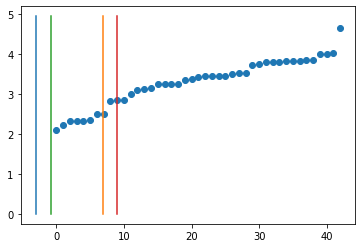

In [1573]:
# confidence interval
import scipy.stats as stats

increase_percetage_value = 0.1
ext_x1 = [np.min(x1), np.max(x1)]
ext_x2 = [np.min(x2), np.max(x2)]
ext_x3 = [np.min(x3), np.max(x3)]

increasedby_min_x1 = ext_x1[0]*(1+increase_percetage_value)
increasedby_min_x2 = ext_x2[0]*(1+increase_percetage_value)
increasedby_min_x3 = ext_x3[0]*(1+increase_percetage_value)
y_hat_min = B[0] + B[1]*increasedby_min_x1 + B[2]*increasedby_min_x2 + B[3]*increasedby_min_x3
increasedby_max_x1 = ext_x1[1]*(1+increase_percetage_value)
increasedby_max_x2 = ext_x2[1]*(1+increase_percetage_value)
increasedby_max_x3 = ext_x3[1]*(1+increase_percetage_value)
y_hat_max =  B[0] + B[1]*increasedby_max_x1 + B[2]*increasedby_max_x2 + B[3]*increasedby_max_x3

n = len(y)
sigma_hat_sqr_e_min = np.sum([(y[i] - y_hat_min)**2 for i in range(n)])/(n - 2)
sigma_hat_sqr_e_max = np.sum([(y[i] - y_hat_max)**2 for i in range(n)])/(n - 2)

# 6
alpha = 0.05
m = 1
q = 1 - alpha/2
t_table = stats.t.ppf(q, n-m)
delta_min = sigma_hat_sqr_e_min*t_table
print(f"Confidence interval (alpha={1-alpha}) for 'y_hat_min': ({y_hat_min - delta_min}, {y_hat_min + delta_min})")
delta_max = sigma_hat_sqr_e_max*t_table
print(f"Confidence interval (alpha={1-alpha}) for 'y_hat_max': ({y_hat_max - delta_max}, {y_hat_max + delta_max})")

y.sort()
plt.scatter([i for i in range(len(y))], y)
line = np.arange(0, 5, (5 - 0)/100)
plt.plot([y_hat_min - delta_min for i in range(100)], line)
plt.plot([y_hat_min + delta_min for i in range(100)], line)

plt.plot([y_hat_max - delta_min for i in range(100)], line)
plt.plot([y_hat_max + delta_min for i in range(100)], line)

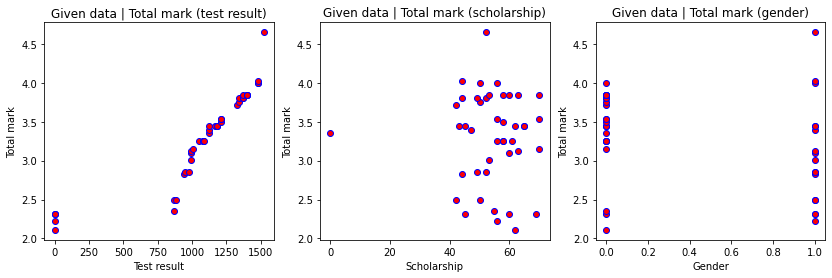

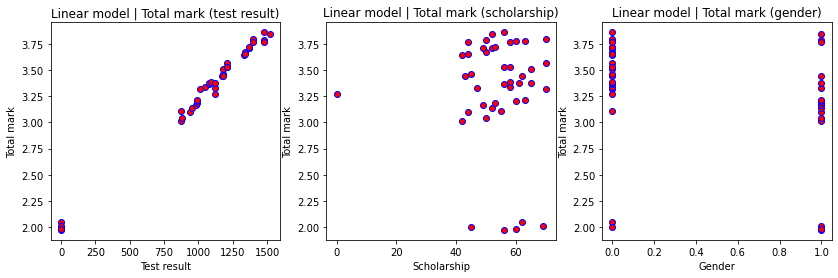

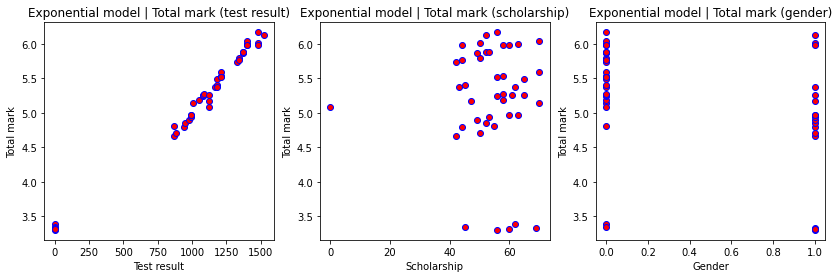

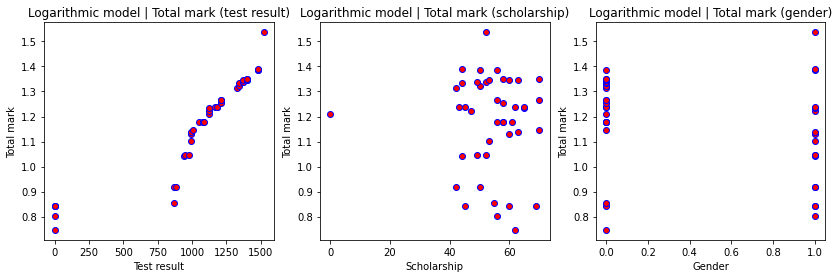

In [1574]:
def plot_model(y, type):
    fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1, ncols=3,
    figsize=(14, 4),

)
    ax1.scatter(x=x1, y=y, marker='o', c='r', edgecolor='b')
    ax1.set_title(f'{type} | Total mark (test result)')
    ax1.set_xlabel('Test result')
    ax1.set_ylabel('Total mark')
    ax2.scatter(x=x2, y=y, marker='o', c='r', edgecolor='b')
    ax2.set_title(f'{type} | Total mark (scholarship)')
    ax2.set_xlabel('Scholarship')
    ax2.set_ylabel('Total mark')
    ax3.scatter(x=x3, y=y, marker='o', c='r', edgecolor='b')
    ax3.set_title(f'{type} | Total mark (gender)')
    ax3.set_xlabel('Gender')
    ax3.set_ylabel('Total mark')
    plt.show()

plot_model(y, "Given data")
plot_model(y_roz, "Linear model")
plot_model(y_exp_roz, "Exponential model")
plot_model(y_log, "Logarithmic model")